Create an image classifier

In [1]:
#%pip install tensorflow
#%pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tensorflow as tf
from tensorflow import keras

from src.functions import load_fashion_mnist_data
from src.lists import class_names
from src.models import (
    create_sequential_model,
    compile_model,
    fit_model,
)


print('Tensorflow version', tf.__version__)
print('Keras version', keras.__version__)

Tensorflow version 2.9.1
Keras version 2.9.0


## Using Keras to Load the Dataset

In [3]:
X_train, X_test, X_valid, y_train, y_test, y_valid = load_fashion_mnist_data()

Loading data ... 
X_train shape (55000, 28, 28)
X_train dtype float64
X_test shape (10000, 28, 28)
X_test dtype uint8
X_valid shape (5000, 28, 28)
X_valid dtype float64
y_train shape (55000,)
y_train dtype uint8
y_test shape (10000,)
y_test dtype uint8
y_valid shape (5000,)
y_valid dtype uint8


In [4]:
print("The class names are the following:\n", class_names)

The class names are the following:
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Creating the Model Using the Sequential API

In [5]:
model = create_sequential_model(input_shape_dim=28)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None

Layers:


In [6]:
"""
For a Dense layer, we have access to  the connection weights and the bias terms:
"""
weights, biases = model.layers[3].get_weights()
print("Weights of layer 4:\n", weights)
print("Shape of weights of layer 4:\n",weights.shape)
print("Biases of layer 4:\n",biases)
print("Shape of biases of layer 4:\n",biases.shape)

Weights of layer 4:
 [[ 0.12369207 -0.09811945  0.12765667  0.16465786  0.18050513  0.04568243
   0.13095629  0.10623389  0.06757498 -0.00161345]
 [ 0.03418505  0.09055024  0.01146755  0.19777352  0.0274848   0.22680625
   0.19486693 -0.05102134  0.01101051  0.11507225]
 [ 0.06867945  0.05680069 -0.22572455  0.21088141 -0.10416229  0.22266409
  -0.08246496 -0.22153449 -0.18157238  0.04291055]
 [ 0.23010027  0.09951258  0.17679572 -0.01439233  0.13403884 -0.03452581
   0.03931653 -0.04227121  0.1926282   0.10026196]
 [-0.06467916 -0.19283001 -0.07605834 -0.10010269  0.21024463 -0.11778364
  -0.17612474 -0.10361081 -0.14820394 -0.20219499]
 [ 0.12672243  0.19817525 -0.1773698   0.16213354  0.09680066  0.00640221
  -0.02611603 -0.2333577  -0.17936118 -0.10718518]
 [-0.01357001 -0.01500601  0.2164346  -0.22484455 -0.1661419   0.03006381
   0.07194445  0.00376475  0.03818339  0.08988249]
 [ 0.20433131  0.10708183 -0.11153077 -0.206362   -0.22926697  0.16661689
  -0.08955307 -0.23107438 -0.0

In [7]:
model = compile_model(model_we_have=model)

Epoch 1/50
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7064 - accuracy: 0.7686 - val_loss: 0.4950 - val_accuracy: 0.8356
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4831 - accuracy: 0.8330 - val_loss: 0.4349 - val_accuracy: 0.8524
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4391 - accuracy: 0.8455 - val_loss: 0.4157 - val_accuracy: 0.8562
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4143 - accuracy: 0.8550 - val_loss: 0.4011 - val_accuracy: 0.8628
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8608 - val_loss: 0.4017 - val_accuracy: 0.8554
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8669 - val_loss: 0.3680 - val_accuracy: 0.8732
Epoch 7/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3641 - accuracy: 0.8714 - val_loss: 0.3556 - val_accuracy:

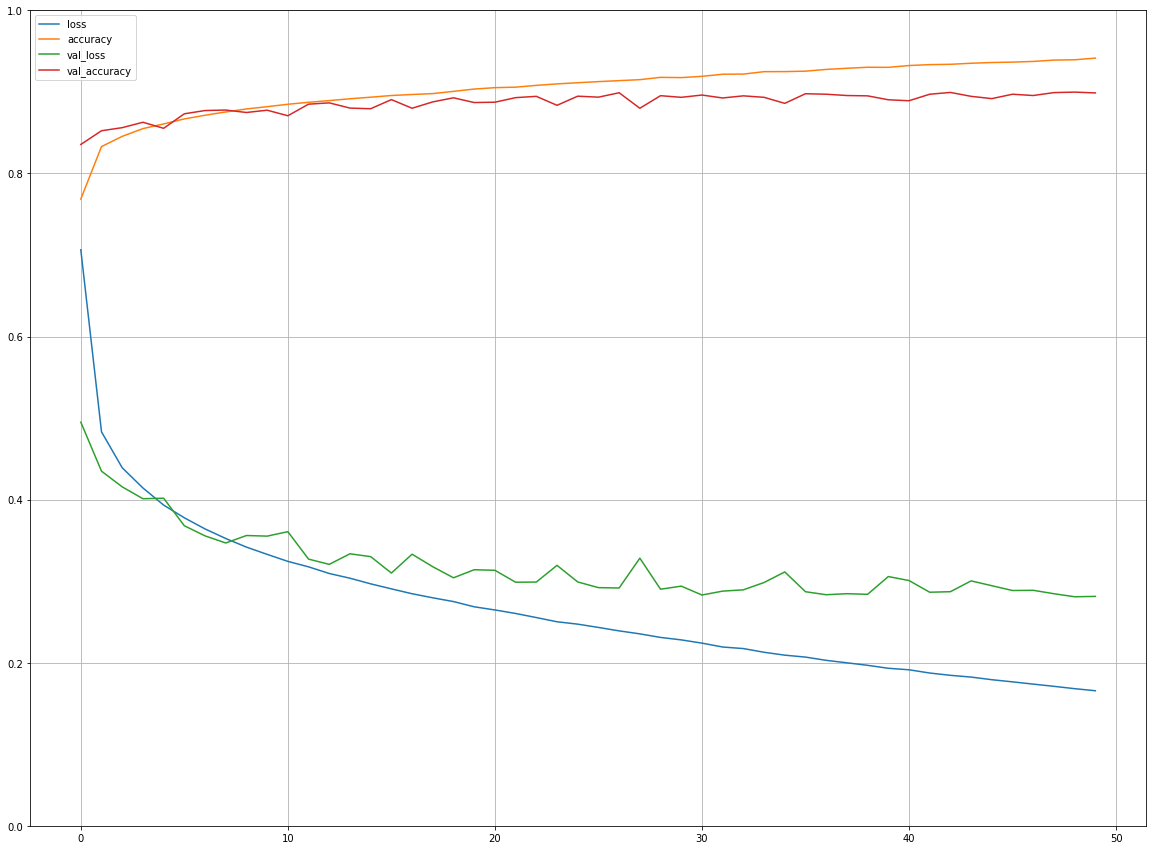

In [8]:

history = fit_model(
    model_we_have=model,
    x_train_df=X_train,  
    y_train_df=y_train,
    x_valid_df=X_valid,  
    y_valid_df=y_valid,
)

Train the model

In [9]:
"""
Evaluate the model on test sets
"""

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 66.0718 - accuracy: 0.8530


[66.0718002319336, 0.8529999852180481]

In [10]:
"""
Using the Model to Make Predictions
"""

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 84ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
"""
the model estimates one probability per class, from class 0 to class 9. 
For example, for the first image it estimates that the probability of class 9 (ankle boot) is 100%, 
for the second image the probability of class 2 (sneaker) is 100%, 
for the third image the probability of class 1 (sandal) is 100%, and the other classes are negligible.
"""

'\nthe model estimates one probability per class, from class 0 to class 9. \nFor example, for the first image it estimates that the probability of class 9 (ankle boot) is 100%, \nfor the second image the probability of class 2 (sneaker) is 100%, \nfor the third image the probability of class 1 (sandal) is 100%, and the other classes are negligible.\n'

In [12]:
"""If you only care about the class with the highest estimated
probability (even if that probability is quite low) then you can use the pre
dict_classes() method instead:"""

y_pred = (model.predict(X_new) > 0.5).astype("int32")
y_pred
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 18ms/step


array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

In [13]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)